In [25]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [26]:
dt = pd.read_csv(r"C:\Users\INDU PRIYA\OneDrive\Attachments\Desktop\ML Models\delivery_time.csv")
dt

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
dt.shape

(21, 2)

In [4]:
dt.dtypes

Delivery_Time    float64
Sorting_Time       int64
dtype: object

In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
dt.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [27]:
x = dt[['Delivery_Time']]
x

,Delivery_Time
0,21.00
1,13.50
2,19.75
3,24.00
4,29.00
5,15.35
6,19.00
7,9.50
8,17.90
9,18.75


In [28]:
y = dt['Sorting_Time']
y

0     10
1      4
2      6
3      9
4     10
5      6
6      7
7      3
8     10
9      9
10     8
11     4
12     7
13     3
14     3
15     4
16     6
17     7
18     2
19     7
20     5
Name: Sorting_Time, dtype: int64

In [29]:
lr = LinearRegression()
lr.fit(x,y)
y_pred = lr.predict(x).round(2)
y_pred

array([ 7.93,  4.83,  7.41,  9.17, 11.24,  5.59,  7.1 ,  3.17,  6.65,
        7.  ,  7.45,  3.69,  6.14,  4.  ,  4.22,  5.4 ,  4.93,  6.74,
        2.55,  6.62,  8.14])

In [30]:
from sklearn.metrics import r2_score,mean_squared_error,root_mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

In [31]:
r2_score(y,y_pred)

0.682264738393515

In [12]:
mean_absolute_error(y,y_pred)

1.070952380952381

In [13]:
mean_squared_error(y,y_pred)

1.955404761904762

In [14]:
mean_absolute_percentage_error(y,y_pred)

0.19146504157218439

In [15]:
root_mean_squared_error(y,y_pred)

1.3983578804815175

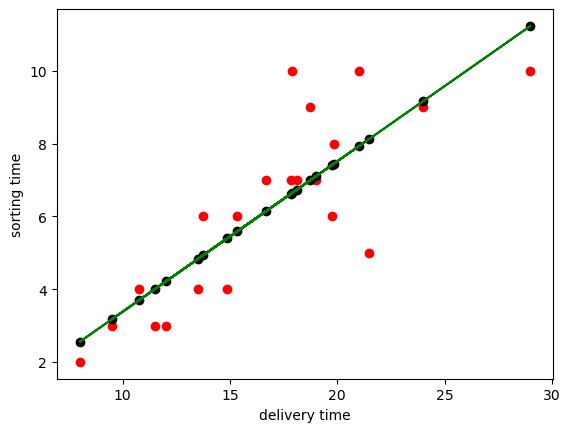

In [32]:
plt.scatter(x,y,color='red',label='delivery data')
plt.plot(x,y_pred,color='green',label='Linear Regression')
plt.scatter(x,y_pred,color='Black',label='Linear Regression')
plt.xlabel('delivery time')
plt.ylabel('sorting time')
plt.show()

In [33]:
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x)
x_poly

array([[1.00000000e+00, 2.10000000e+01, 4.41000000e+02, 9.26100000e+03],
       [1.00000000e+00, 1.35000000e+01, 1.82250000e+02, 2.46037500e+03],
       [1.00000000e+00, 1.97500000e+01, 3.90062500e+02, 7.70373438e+03],
       [1.00000000e+00, 2.40000000e+01, 5.76000000e+02, 1.38240000e+04],
       [1.00000000e+00, 2.90000000e+01, 8.41000000e+02, 2.43890000e+04],
       [1.00000000e+00, 1.53500000e+01, 2.35622500e+02, 3.61680537e+03],
       [1.00000000e+00, 1.90000000e+01, 3.61000000e+02, 6.85900000e+03],
       [1.00000000e+00, 9.50000000e+00, 9.02500000e+01, 8.57375000e+02],
       [1.00000000e+00, 1.79000000e+01, 3.20410000e+02, 5.73533900e+03],
       [1.00000000e+00, 1.87500000e+01, 3.51562500e+02, 6.59179688e+03],
       [1.00000000e+00, 1.98300000e+01, 3.93228900e+02, 7.79772909e+03],
       [1.00000000e+00, 1.07500000e+01, 1.15562500e+02, 1.24229688e+03],
       [1.00000000e+00, 1.66800000e+01, 2.78222400e+02, 4.64074963e+03],
       [1.00000000e+00, 1.15000000e+01, 1.32250000e

In [34]:
poly_reg = LinearRegression()
poly_reg.fit(x_poly,y)
poly_y = poly_reg.predict(x_poly)

In [35]:
print(r2_score(y,poly_y))

0.7164449934795138


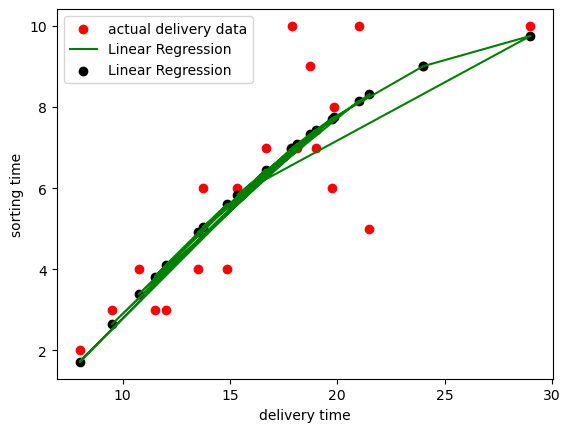

In [36]:
plt.scatter(x,y,color='red',label='actual delivery data')
plt.plot(x,poly_y,color='green',label='Linear Regression')
plt.scatter(x,poly_y,color='black',label='Linear Regression')
plt.xlabel('delivery time')
plt.ylabel('sorting time')
plt.legend()
plt.show()

In [1]:
from sklearn.linear_model import Ridge,Lasso

In [38]:
rm = Ridge()
rm.fit(x,y)
y_rd = rm.predict(x).round(2)
y_rd

array([ 7.93,  4.83,  7.41,  9.17, 11.23,  5.6 ,  7.1 ,  3.18,  6.65,
        7.  ,  7.45,  3.7 ,  6.14,  4.01,  4.22,  5.4 ,  4.93,  6.74,
        2.56,  6.62,  8.14])

In [39]:
r2_score(y,y_rd)

0.6822972365512158

In [40]:
lr = Lasso(alpha=1,max_iter=200)
lr.fit(x,y)
y_pred=lr.predict(x).round()
r2_score(y,y_pred)

0.7214443625644804